# Lecture 5. EDA

A demo of data cleaning and exploratory data analysis using the CDC Tuberculosis data and the Mauna Loa CO2 data.

In [62]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set style for seaborn plots
sns.set_style('dark')
sns.color_palette("viridis", as_cmap=True)
sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Stop scientific notation for pandas
pd.set_option('display.float_format', '{:.2f}'.format)

---
## 1. Structure: multiple files

In [31]:
# Loading the tb data set
tb = pd.read_csv('data/cdc_tuberculosis.csv', header = 1, thousands = ',')

# Renaming year.1 -> incidence for better distinction
rename_dict = {'2019': 'TB cases 2019',
               '2020': 'TB cases 2020',
               '2021': 'TB cases 2021',
               '2019.1': 'TB incidence 2019',
               '2020.1': 'TB incidence 2020',
               '2021.1': 'TB incidence 2021',
               'U.S. jurisdiction': 'geo'}

tb = tb.rename(columns = rename_dict)

# Getting rid of the first total aggregated row
tb = tb[1:]
tb.head(2)


,geo,TB cases 2019,TB cases 2020,TB cases 2021,TB incidence 2019,TB incidence 2020,TB incidence 2021
1,Alabama,87,72,92,1.77,1.43,1.83
2,Alaska,58,58,58,7.91,7.92,7.92


Gathering census data

In [32]:
census_2010s = (pd.read_csv('data/nst-est2019-01.csv', header = 3, thousands = ',') 
    .rename(columns = {'Unnamed: 0': 'geo'})
    .dropna()
    .reset_index() # without this line there would be no 'index' column
    .drop(columns = ['index', 'Estimates Base', 'Census'])
    .convert_dtypes()
)
census_2010s['geo'] = census_2010s['geo'].str.strip('.')
census_2010s.head(2)

,geo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,Northeast,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803


In [33]:
census_2020s = (pd.read_csv('data/NST-EST2022-POP.csv', header = 3, thousands = ',')
    .dropna()
    .drop(columns = ['Unnamed: 1'])
    .rename(columns = {'Unnamed: 0': 'geo'})
)
census_2020s['geo'] = census_2020s['geo'].str.strip('.')
census_2020s.head(2)

,geo,2020,2021,2022
0,United States,331511512.00,332031554.00,333287557.00
1,Northeast,57448898.00,57259257.00,57040406.00


In [34]:
# Merging tb, census 2010s and 2020s
merged = (
    tb
    .merge(right = census_2010s, # merge tb and 2010s
    on = 'geo')
    .merge(right = census_2020s, # merge tba nd 2020s 
    on = 'geo')
)
merged

,geo,TB cases 2019,TB cases 2020,TB cases 2021,TB incidence 2019,TB incidence 2020,TB incidence 2021,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,87,72,92,1.77,1.43,1.83,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5031362.00,5049846.00,5074296.00
1,Alaska,58,58,58,7.91,7.92,7.92,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545,732923.00,734182.00,733583.00
2,Arizona,183,136,129,2.51,1.89,1.77,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717,7179943.00,7264877.00,7359197.00
3,Arkansas,64,59,69,2.12,1.96,2.28,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804,3014195.00,3028122.00,3045637.00
4,California,2111,1706,1750,5.35,4.32,4.46,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223,39501653.00,39142991.00,39029342.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Virginia,191,169,161,2.23,1.96,1.86,8023699,8101155,8185080,8252427,8310993,8361808,8410106,8463587,8501286,8535519,8636471.00,8657365.00,8683619.00
47,Washington,221,163,199,2.90,2.11,2.57,6742830,6826627,6897058,6963985,7054655,7163657,7294771,7423362,7523869,7614893,7724031.00,7740745.00,7785786.00
48,West Virginia,9,13,7,0.50,0.73,0.39,1854239,1856301,1856872,1853914,1849489,1842050,1831023,1817004,1804291,1792147,1791420.00,1785526.00,1775156.00
49,Wisconsin,51,35,66,0.88,0.59,1.12,5690475,5705288,5719960,5736754,5751525,5760940,5772628,5790186,5807406,5822434,5896271.00,5880101.00,5892539.00


Reproducing incidence

Total cases per 100000 person per state: incidence = tb case * 100000 / population

In [35]:
for year in [2019, 2020, 2021]:
    merged[f'recomputed_incidence_{year}'] = merged[f'TB cases {year}'] * 100000 / merged[f'{year}']
merged.head(2)

,geo,TB cases 2019,TB cases 2020,TB cases 2021,TB incidence 2019,TB incidence 2020,TB incidence 2021,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,recomputed_incidence_2019,recomputed_incidence_2020,recomputed_incidence_2021
0,Alabama,87,72,92,1.77,1.43,1.83,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5031362.00,5049846.00,5074296.00,1.77,1.43,1.82
1,Alaska,58,58,58,7.91,7.92,7.92,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545,732923.00,734182.00,733583.00,7.93,7.91,7.90


---
## 2. Structure: files of different formats

This lecture = covers TSV and JSON - pandas supports them out of box

### TSV file

In [36]:
with open("data/cdc_tuberculosis.tsv", "r") as f:
    for i, row in enumerate(f):
        print(repr(row)) # print raw strings
        if i >= 3: break

'\tNo. of TB cases\t\t\tTB incidence\t\t\n'
'U.S. jurisdiction\t2019\t2020\t2021\t2019\t2020\t2021\n'
'Total\t"8,900"\t"7,173"\t"7,860"\t2.71\t2.16\t2.37\n'
'Alabama\t87\t72\t92\t1.77\t1.43\t1.83\n'


A quick note: the above is a very explicit way to loop over the first 4 lines of the file by controlling a line counter. We can do the same with more concise code by letting Python read the lines in the file for us and grabbing the first four:

In [37]:
with open("data/cdc_tuberculosis.tsv", "r") as f:
    for row in f.readlines()[:4]:
        print(repr(row)) # print raw strings

'\tNo. of TB cases\t\t\tTB incidence\t\t\n'
'U.S. jurisdiction\t2019\t2020\t2021\t2019\t2020\t2021\n'
'Total\t"8,900"\t"7,173"\t"7,860"\t2.71\t2.16\t2.37\n'
'Alabama\t87\t72\t92\t1.77\t1.43\t1.83\n'


The only drawback here is that we read the entire file when we only want the first few lines. That can be wasteful. The Python zip built-in function (docs here) is a useful thing to know about. This code may look a little odd at first, but it does the same as the first example above but much more concisely, and once you get used to thinking about zip, it becomes a very natural tool to express various iteration strategies:

The pd.read_csv function also reads in TSVs if we specify the delimiter with parameter sep='\t'

In [38]:
tuberculosis_tsv = pd.read_csv('data/cdc_tuberculosis.tsv', sep = '\t')
tuberculosis_tsv.head(2)

,Unnamed: 0,No. of TB cases,Unnamed: 2,Unnamed: 3,TB incidence,Unnamed: 5,Unnamed: 6
0,U.S. jurisdiction,2019,2020,2021,2019.00,2020.00,2021.00
1,Total,"8,900","7,173","7,860",2.71,2.16,2.37


### Json file

In [39]:
from ds100_utils import fetch_and_cache

In [40]:
# DOESNT WORK COS data.cityofberkeley.info closed the connection
#covid_file = fetch_and_cache(
#    "https://data.cityofberkeley.info/api/views/xn6j-b766/rows.json?accessType=DOWNLOAD",
#    "confirmed-cases.json",
#    force=False)
#covid_file  

# Can use pd.read_json

### Probing the file 
#### File SIZE

Often, I like to start my analysis by getting a rough estimate of the size of the data. This will help inform the tools I use and how I view the data. If it is relatively small I might use a text editor or a spreadsheet to look at the data. If it is larger, I might jump to more programmatic exploration or even used distributed computing tools.

However here we will use Python tools to probe the file (tb).

Since these seem to be text files I might also want to investigate the number of lines, which often corresponds to the number of records.

In [41]:
import os
import pandas as pd

# Check the file size
file_size = os.path.getsize('data/Berkeley_PD_-_Calls_for_Service.csv')
print(f'File size: {file_size / (1024 * 1024):.2f} MB')

# Count the number of lines
line_count = sum(1 for line in open('data/Berkeley_PD_-_Calls_for_Service.csv'))
print(f'Number of lines: {line_count}')

File size: 0.49 MB
Number of lines: 7877


Can use Unix commands -> allows for quick inspection without directly loading the file into memory -> BUT might not be as portable across different operating systems.

In [42]:
!ls -lh {'data/Berkeley_PD_-_Calls_for_Service.csv'}
!wc -l {'data/Berkeley_PD_-_Calls_for_Service.csv'}

'ls' is not recognized as an internal or external command,
operable program or batch file.
'wc' is not recognized as an internal or external command,
operable program or batch file.


Based on the probing results, the file "Berkeley_PD_-_Calls_for_Service.csv" has approximately 7,877 lines and an approximate file size of 0.48 MB. This file size is relatively small, and you can comfortably load and manipulate it in memory using pandas without major performance concerns. Small to moderately sized datasets like this one can be easily handled by most personal computers.

You can proceed with importing the data into a DataFrame and performing your analysis or exploration as needed (pd.read_csv)

#### File CONTENT

skipped cos 0 access to data

---
## 3. Temporality

In [43]:
calls = pd.read_csv('data/Berkeley_PD_-_Calls_for_Service.csv')
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,21014296,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:58,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\r\n(37.869058, -122.270455)",NaN,Berkeley,CA
1,21014391,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:38,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\r\n(37.869058, -122.270455)",NaN,Berkeley,CA
2,21090494,THEFT MISD. (UNDER $950),04/19/2021 12:00:00 AM,12:15,LARCENY,1,06/15/2021 12:00:00 AM,"2100 BLOCK HASTE ST\r\nBerkeley, CA\r\n(37.864...",2100 BLOCK HASTE ST,Berkeley,CA
3,21090204,THEFT FELONY (OVER $950),02/13/2021 12:00:00 AM,17:00,LARCENY,6,06/15/2021 12:00:00 AM,"2600 BLOCK WARRING ST\r\nBerkeley, CA\r\n(37.8...",2600 BLOCK WARRING ST,Berkeley,CA
4,21090179,BURGLARY AUTO,02/08/2021 12:00:00 AM,6:20,BURGLARY - VEHICLE,1,06/15/2021 12:00:00 AM,"2700 BLOCK GARBER ST\r\nBerkeley, CA\r\n(37.86...",2700 BLOCK GARBER ST,Berkeley,CA


Looks like there are three columns with dates/times: EVENTDT, EVENTTM, and InDbDate.

Most likely, EVENTDT stands for the date when the event took place, EVENTTM stands for the time of day the event took place (in 24-hr format), and InDbDate is the date this call is recorded onto the database.

If we check the data type of these columns, we will see they are stored as strings. 

In [44]:
date_columns = ['EVENTDT', 'EVENTTM', 'InDbDate']
data_types = calls[date_columns].dtypes
data_types
# Object -> they are in string format or if the data contains various formats that can't be directly converted to a datetime format.

EVENTDT     object
EVENTTM     object
InDbDate    object
dtype: object

We can convert them to datetime objects using pandas to_datetime function.

In [45]:
calls["EVENTDT"] = pd.to_datetime(calls["EVENTDT"])
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,21014296,THEFT MISD. (UNDER $950),2021-04-01,10:58,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\r\n(37.869058, -122.270455)",NaN,Berkeley,CA
1,21014391,THEFT MISD. (UNDER $950),2021-04-01,10:38,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\r\n(37.869058, -122.270455)",NaN,Berkeley,CA
2,21090494,THEFT MISD. (UNDER $950),2021-04-19,12:15,LARCENY,1,06/15/2021 12:00:00 AM,"2100 BLOCK HASTE ST\r\nBerkeley, CA\r\n(37.864...",2100 BLOCK HASTE ST,Berkeley,CA
3,21090204,THEFT FELONY (OVER $950),2021-02-13,17:00,LARCENY,6,06/15/2021 12:00:00 AM,"2600 BLOCK WARRING ST\r\nBerkeley, CA\r\n(37.8...",2600 BLOCK WARRING ST,Berkeley,CA
4,21090179,BURGLARY AUTO,2021-02-08,6:20,BURGLARY - VEHICLE,1,06/15/2021 12:00:00 AM,"2700 BLOCK GARBER ST\r\nBerkeley, CA\r\n(37.86...",2700 BLOCK GARBER ST,Berkeley,CA


Now we can use the dt accessor on this column.

In [46]:
calls["EVENTDT"].dt.dayofweek

0       3
1       3
2       0
3       5
4       0
       ..
2627    0
2628    2
2629    2
2630    5
2631    4
Name: EVENTDT, Length: 2632, dtype: int32

---
## 4. Data faithfulness

Importing txt file:

In [47]:
co2 = pd.read_csv(
    'data/co2_mm_mlo.txt', header = None, skiprows = 72,
    sep = r'\s+',       # delimiter for continuous whitespace (sep & delimiter = both work))
    names = ['Yr', 'Mo', 'DecDate', 'Avg', 'Int', 'Trend', 'Days']
)
co2

,Yr,Mo,DecDate,Avg,Int,Trend,Days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
3,1958,6,1958.46,-99.99,317.10,314.85,-1
4,1958,7,1958.54,315.86,315.86,314.98,-1
...,...,...,...,...,...,...,...
733,2019,4,2019.29,413.32,413.32,410.49,26
734,2019,5,2019.38,414.66,414.66,411.20,28
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23


<Axes: xlabel='DecDate', ylabel='Avg'>

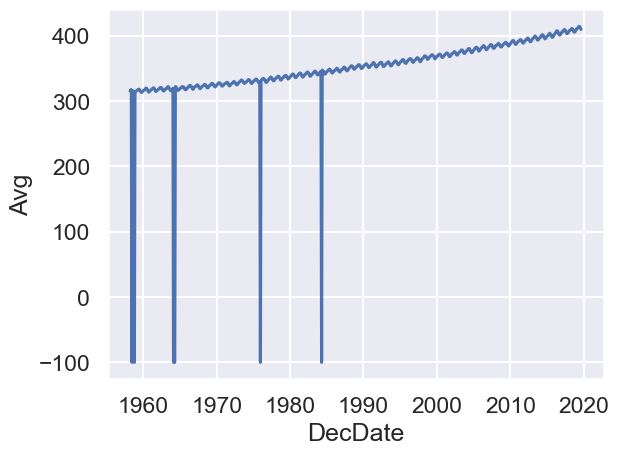

In [48]:
sns.lineplot(
    data = co2,
    x = 'DecDate',
    y = 'Avg'
)

There are weird little 'dips' -> Let's check the description at the top of the file again.

* -1 signifies a missing value for the number of days Days the equipment was in operation that month.
* -99.99 denotes a missing monthly average Avg

First, we consider the shape of the data. How many rows should we have?

If chronological order, we should have one record per month. Data from March 1958 to August 2019.

-> We should have 738 records

In [49]:
co2.shape #nrows = ok

(738, 7)

### X axis: days

Days is a time field, so let's analyze other time fields to see if there is an explanation for missing values of days of operation.

Let's start with months Mo.

Are we missing any records? The number of months should have 62 or 61 instances (March 1957-August 2019).

In [50]:
co2['Mo'].value_counts().sort_index() # ok results too

Mo
1     61
2     61
3     62
4     62
5     62
6     62
7     62
8     62
9     61
10    61
11    61
12    61
Name: count, dtype: int64

In [51]:
co2['Days'].value_counts().sort_index() 

Days
-1     194
 0       1
 2       1
 8       1
 10      1
 12      5
 13      1
 14      4
 15      2
 16      5
 17      9
 18      9
 19     13
 20     12
 21     20
 22     18
 23     29
 24     42
 25     47
 26     63
 27     61
 28     74
 29     55
 30     53
 31     18
Name: count, dtype: int64

How does it work for -1 days?

<Axes: xlabel='Days', ylabel='Count'>

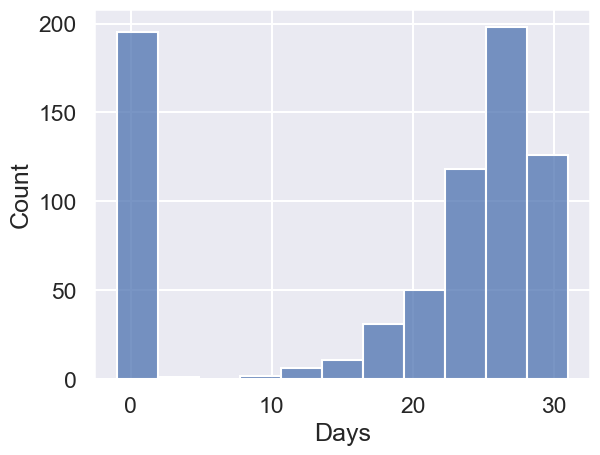

In [52]:
sns.histplot(
    data = co2,
    x = 'Days'
)

On to years

In [53]:
co2['Yr'].value_counts().sort_index() 

Yr
1958    10
1959    12
1960    12
1961    12
1962    12
        ..
2015    12
2016    12
2017    12
2018    12
2019     8
Name: count, Length: 62, dtype: int64

<Axes: xlabel='Yr', ylabel='Days'>

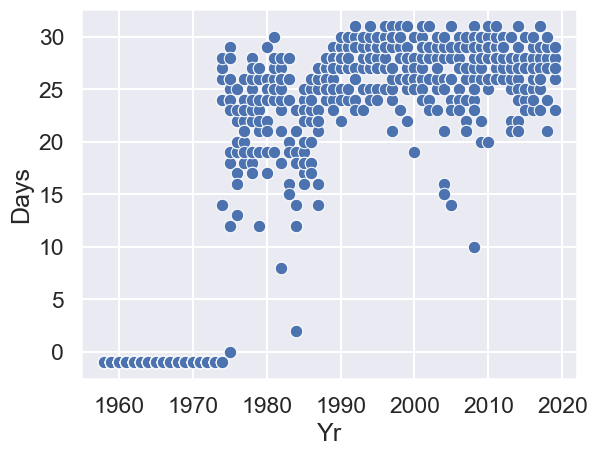

In [54]:
sns.scatterplot(
    data = co2,
    x = 'Yr',
    y = 'Days'
)

Observations:

* All of the missing data are in the early years of operation.
* It appears there may have been problems with equipment in the mid to late 80s.

Potential Next Steps:

* Confirm these explanations through documentation about the historical readings.
* Maybe drop earliest recordings? However, we would want to delay such action until after we have examined the time trends and assess whether there are any potential problems.

### Y axis: Avg

Next, let's return to the -99.99 values in Avg to analyze the overall quality of the CO2 measurements.

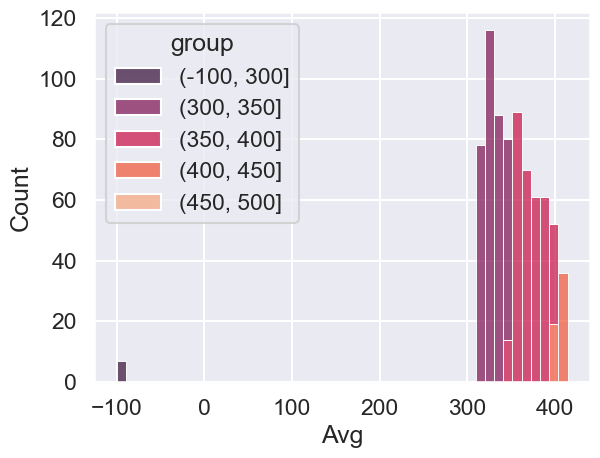

In [55]:
#optional - creating != groups 4 hue
groups = [-100, 300, 350, 400, 450, 500]
# Create a new column in DataFrame to categorise the data into the specified groups
co2['group'] = pd.cut(co2['Avg'], bins=groups).copy()

sns.histplot(
    data=co2, 
    x='Avg', 
    hue='group', 
    palette='rocket', 
    multiple="stack");

In [56]:
#checking for missing values
co2[co2["Avg"] < 0] # not a lot, only 7

,Yr,Mo,DecDate,Avg,Int,Trend,Days,group
3,1958,6,1958.46,-99.99,317.10,314.85,-1,"(-100, 300]"
7,1958,10,1958.79,-99.99,312.66,315.61,-1,"(-100, 300]"
71,1964,2,1964.12,-99.99,320.07,319.61,-1,"(-100, 300]"
72,1964,3,1964.21,-99.99,320.73,319.55,-1,"(-100, 300]"
73,1964,4,1964.29,-99.99,321.77,319.48,-1,"(-100, 300]"
213,1975,12,1975.96,-99.99,330.59,331.60,0,"(-100, 300]"
313,1984,4,1984.29,-99.99,346.84,344.27,2,"(-100, 300]"


There doesn't seem to be a pattern to these values, other than that most records also were missing Days data.

Drop, NaN, or Impute Missing Avg Data?
How should we address the invalid Avg data?

A. Drop records

B. Set to NaN

C. Impute using some strategy

Remember we want to fix the following plot:

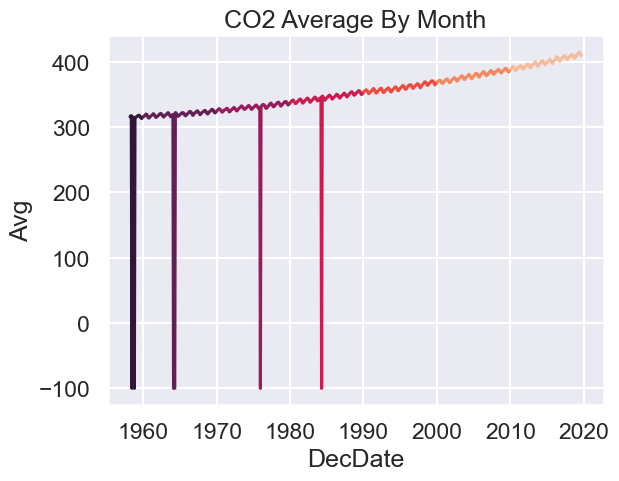

In [57]:
#unnecesary stuffs
decdate_groups = np.arange(1950, 2030, 10)
co2['decdate_groups_col'] = pd.cut(co2['DecDate'], bins=decdate_groups).copy()

sns.lineplot(
    data = co2,
    x='DecDate',
    y='Avg',
    hue = 'decdate_groups_col',
    palette = 'rocket',
    legend = False)

plt.title("CO2 Average By Month");

### Addressing the issue
1. Drop missing values
2. Replace NaN with -99.99
3. Imputation - using the interpolated column which estimates missing avg values

In [58]:
# 1. Drop missing values, only pick the ones > 0
co2_drop = co2[co2['Avg'] > 0]
co2_drop # 731 rows

,Yr,Mo,DecDate,Avg,Int,Trend,Days,group,decdate_groups_col
0,1958,3,1958.21,315.71,315.71,314.62,-1,"(300, 350]","(1950, 1960]"
1,1958,4,1958.29,317.45,317.45,315.29,-1,"(300, 350]","(1950, 1960]"
2,1958,5,1958.38,317.50,317.50,314.71,-1,"(300, 350]","(1950, 1960]"
4,1958,7,1958.54,315.86,315.86,314.98,-1,"(300, 350]","(1950, 1960]"
5,1958,8,1958.62,314.93,314.93,315.94,-1,"(300, 350]","(1950, 1960]"
...,...,...,...,...,...,...,...,...,...
733,2019,4,2019.29,413.32,413.32,410.49,26,"(400, 450]","(2010, 2020]"
734,2019,5,2019.38,414.66,414.66,411.20,28,"(400, 450]","(2010, 2020]"
735,2019,6,2019.46,413.92,413.92,411.58,27,"(400, 450]","(2010, 2020]"
736,2019,7,2019.54,411.77,411.77,411.43,23,"(400, 450]","(2010, 2020]"


In [59]:
#2. Replace -99.99 with NaN
co2_replace = co2.replace(-99.99, np.NaN)
co2_replace
# 738 rows

,Yr,Mo,DecDate,Avg,Int,Trend,Days,group,decdate_groups_col
0,1958,3,1958.21,315.71,315.71,314.62,-1,"(300, 350]","(1950, 1960]"
1,1958,4,1958.29,317.45,317.45,315.29,-1,"(300, 350]","(1950, 1960]"
2,1958,5,1958.38,317.50,317.50,314.71,-1,"(300, 350]","(1950, 1960]"
3,1958,6,1958.46,NaN,317.10,314.85,-1,"(-100, 300]","(1950, 1960]"
4,1958,7,1958.54,315.86,315.86,314.98,-1,"(300, 350]","(1950, 1960]"
...,...,...,...,...,...,...,...,...,...
733,2019,4,2019.29,413.32,413.32,410.49,26,"(400, 450]","(2010, 2020]"
734,2019,5,2019.38,414.66,414.66,411.20,28,"(400, 450]","(2010, 2020]"
735,2019,6,2019.46,413.92,413.92,411.58,27,"(400, 450]","(2010, 2020]"
736,2019,7,2019.54,411.77,411.77,411.43,23,"(400, 450]","(2010, 2020]"


In [60]:
# Impute
co2_impute = co2.copy()
co2_impute['Avg'] = co2['Int']
co2_impute
# 738 rows

,Yr,Mo,DecDate,Avg,Int,Trend,Days,group,decdate_groups_col
0,1958,3,1958.21,315.71,315.71,314.62,-1,"(300, 350]","(1950, 1960]"
1,1958,4,1958.29,317.45,317.45,315.29,-1,"(300, 350]","(1950, 1960]"
2,1958,5,1958.38,317.50,317.50,314.71,-1,"(300, 350]","(1950, 1960]"
3,1958,6,1958.46,317.10,317.10,314.85,-1,"(-100, 300]","(1950, 1960]"
4,1958,7,1958.54,315.86,315.86,314.98,-1,"(300, 350]","(1950, 1960]"
...,...,...,...,...,...,...,...,...,...
733,2019,4,2019.29,413.32,413.32,410.49,26,"(400, 450]","(2010, 2020]"
734,2019,5,2019.38,414.66,414.66,411.20,28,"(400, 450]","(2010, 2020]"
735,2019,6,2019.46,413.92,413.92,411.58,27,"(400, 450]","(2010, 2020]"
736,2019,7,2019.54,411.77,411.77,411.43,23,"(400, 450]","(2010, 2020]"


### Replotting using option 3

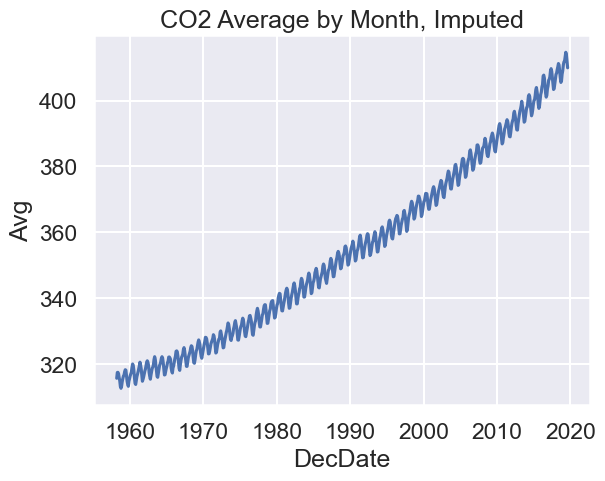

In [61]:
sns.lineplot(
    data = co2_impute,
    x = 'DecDate',
    y = 'Avg'
)
plt.title("CO2 Average by Month, Imputed");